# COMP7404 - Assignment 4

## Part A: Conceptual Questions

Solve the following questions by hand. You can write your answer on a seperate paper (submit as *.pdf) or type it below and submit together with Part B as a single *.ipynb file.


In [47]:
import numpy as np

### A1
Consider a Perceptron with 2 inputs and 1 output. Let the weights of the Perceptron be $w_1 = 1$ and $w_2 = 1$ and let the bias be $w_0 = -1.5$. Calculate the output of the following inputs:(0, 0), (1, 0), (0, 1), (1, 1)

$W=\left(\begin{matrix}1 & 1\end{matrix}\right)$, let $Xs=\left(\begin{matrix}0 & 1 & 0 & 1\\0&0&1&1\end{matrix}\right)$, 4 outputs: $Os=WXs+w_0=\left(\begin{matrix}0&1&1&2\end{matrix}\right)-1.5=\left(\begin{matrix}-1.5&-0.5&-0.5&0.5\end{matrix}\right)$

In [48]:
W = np.array([[1,1]])
w_0=-1.5
X2d = np.array([[0,1,0,1],[0,0,1,1]])
W@X2d+w_0

array([[-1.5, -0.5, -0.5,  0.5]])

### A2
Define a perceptron for the following logical functions: AND, NOT, NAND, NOR



- AND

let $AND(X) = (sign(WX+w_0)+1)/2$, and $W=\left(\begin{matrix}1 & 1\end{matrix}\right), w_0=-1.5$

Therefore, $X=\left(\begin{matrix}0&1&0&1\\0&0&1&1\end{matrix}\right),AND(X)=\left(\begin{matrix}0&0&0&1\end{matrix}\right)$

So does OR gate, set $w_0=-0.5$ can get OR gate.

- NOT

let $W=-1, w_0=1,X=\left(\begin{matrix}0&1\end{matrix}\right)$, then $NOT(X)=WX+w_0=1-X=\left(\begin{matrix}1&0\end{matrix}\right)$

- NAND

simply set $NAND=NOT(AND(X))$

- NOR

simply set $NOR=NOT(OR(X))$, where OR is defined in `AND` part.

In [49]:
## AND
def AND_Gate(X):
	W = np.array([[1,1]])
	w_0=-1.5
	return ((W@X+w_0)>0).astype(int)

print(f"AND \ninput:{X2d} \noutput:{AND_Gate(X2d)}")

def OR_Gate(X):
	W = np.array([[1,1]])
	w_0=-0.5
	return ((W@X+w_0)>0).astype(int)

## NOT
X1d = np.array([0,1])
def NOT_Gate(X):
    return 1-X

print(f"NOT input:{X1d} output:{NOT_Gate(X1d)}")

## NAND
def NAND_Gate(X):
    return NOT_Gate(AND_Gate(X))

print(f"NAND \ninput:{X2d} \noutput:{NAND_Gate(X2d)}")

## NOR
def NOR_Gate(X):
    return NOT_Gate(OR_Gate(X))

print(f"NAND \ninput:{X2d} \noutput:{NOR_Gate(X2d)}")

AND 
input:[[0 1 0 1]
 [0 0 1 1]] 
output:[[0 0 0 1]]
NOT input:[0 1] output:[1 0]
NAND 
input:[[0 1 0 1]
 [0 0 1 1]] 
output:[[1 1 1 0]]
NAND 
input:[[0 1 0 1]
 [0 0 1 1]] 
output:[[1 0 0 0]]


### A3
The parity problem returns 1 if the number of inputs that are 1 is even, and 0 otherwise. Can a perceptron learn this problem for 3 inputs? 


We can define a perceptron learn this problem for 3 input following steps below:


In [50]:
def parityCheck(X: np.ndarray):
    assert(X.shape[0]==3)
    W = np.array([[1,1,1]])
    w_0 = -2
    return  (abs(W@X+w_0)<0.5).astype(int)

X3d = np.array([[0,1,0,1,0,1,0,1],[0,0,1,1,0,0,1,1],[0,0,0,0,1,1,1,1]])
print(f"X:\n{X3d}")

print(f"parity check: {parityCheck(X3d)}")

X:
[[0 1 0 1 0 1 0 1]
 [0 0 1 1 0 0 1 1]
 [0 0 0 0 1 1 1 1]]
parity check: [[0 0 0 1 0 1 1 0]]


### A4
Suppose that the following are a set of point in two classes:

*   Class1: $(1, 1), (1, 2), (2, 1)$
*   Class2: $(0, 0), (1, 0), (0, 1)$

Plot them and find the optimal separating line. What are the support vectors, and what is the meaning?


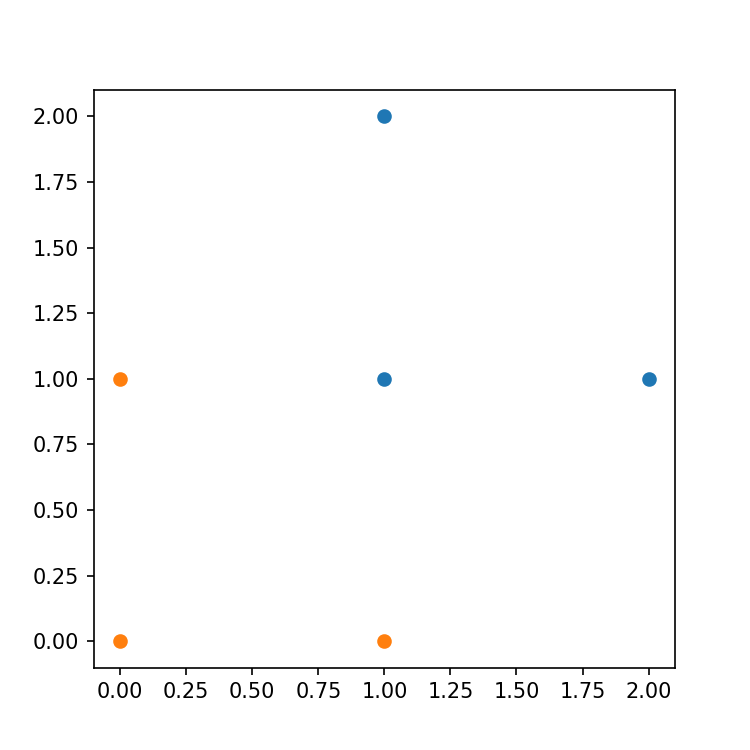

In [75]:
%matplotlib widget
import matplotlib.pyplot as plt

X=np.array([[1,1],[1,2],[2,1],[0,0],[1,0],[0,1]])
y=np.array([0,0,0,1,1,1])
plt.figure(figsize=(5,5))
for cl in np.unique(y):
    plt.scatter(X[y==cl,0],X[y==cl,1])
plt.show()

#### Answer

centroid of class 0: $C_1=\frac{1}{3}((1\quad 1)^T+(1\quad 2)^T+(2\quad 1)^T)=(\frac{4}{3}\quad \frac{4}{3})^T$

centroid of class 1: $C_2=\frac{1}{3}((0\quad 0)^T+(1\quad 0)^T+(0\quad 1)^T)=(\frac{1}{3}\quad \frac{1}{3})^T$

midpoint: $M=\frac{1}{2}(C_1+C_2)=(\frac{5}{6}\quad \frac{5}{6})^T$

Let the line format as: $Ax+y+C=0$

then $-A\times \frac{4/3-1/3}{4/3-1/3}=-1, A=1$, and $1\times 5/6+5/6+C=0, C=-\frac{5}{3}$

#### support vectors

Support vectors are the data points that are closest to the separating hyperplane (in this case, the line).

calculate the distance for each point:$Ds = (0.24\quad0.95\quad0.95\quad1.17\quad0.47\quad0.47)$

and $D_i=dist(x_i)=\frac{|x_i^0+x_i^1-5/3|}{\sqrt{2}}$.

#### meaning

The margin is the distance between the separating hyperplane 
(decision boundary) and the training samples that are closest to this 
hyperplane, which are the so-called support vectors

### A5
Suppose that the probability of five events are $P(first) = 0.5, P(second) = P(third) = P(fourth) = P(fifth) = 0.125$. Calculate the entropy and write down in words what this means. 


$H=-\frac{1}{2}\log_2(\frac{1}{2})-4\times \frac{1}{8}\log_2(\frac{1}{8})=\frac{1}{2}\times 1+4\times 3 / 8=2$ bits

#### means

The entropy value of 2 bits means that, on average, we need 2 bits of information to describe the outcome of one of these events.

In practical terms, it indicates the amount of uncertainty or randomness in the set of events. A higher entropy implies a greater degree of unpredictability. Here, since the probabilities are not highly skewed (i.e., one event is not overwhelmingly more likely than the others), the entropy is relatively high. This means that when observing these events, there is a significant amount of variability in which event is likely to occur next. If the entropy were lower, it would suggest that the outcome is more predictable, and less information would be required on average to communicate the result of an event. For example, if one event had a probability very close to 1 and the others were close to 0, the entropy would be much lower as the outcome would be highly predictable (almost always the event with the high probability would occur). In this case, with an entropy of 2 bits,

 the events are more evenly distributed in terms of likelihood, and there is more uncertainty about which specific event will take place at any given time.

### A6
Design a decision tree that computes the logical AND function. How does it compare to the Perceptron solution?

decision tree formally format as:

if cond(A):

if cond(B):
	
...

else:

In [52]:
Xs = np.array([[0,0],[0,1],[1,0],[1,1]])
result = []
for xi in Xs:
	if xi[0]>0:
		if xi[1]>0:
			result.append(1)
		else:
			result.append(0)
	else:
		result.append(0)
result

[0, 0, 0, 1]

Compare with perceptron solution, decision tree:
* the decision tree is more intuitive and less complex than the perceptron.
* The decision tree has a non-linear decision boundary dividing the input space stepwise.
* the decision tree is more robust to data noise in generalization.
* The decision tree is highly interpretable.

### A7
Turn the following politically incorrect data into a decision tree to classify which attributes make a person attractive, and then extract the rules. Use the Gini Impurity.

| Height  | Hair  | Eyes  | Attractive?  |
|:-:|:-:|:-:|:-:|
| Small  | Blonde  | Brown  | No  |
| Tall  | Dark  | Brown  | No  |
| Tall  | Blonde  | Blue  | Yes  |
| Tall  | Dark  | Blue  | No  |
| Small  | Dark  | Blue  | No  |
| Tall  | Red  | Blue  | Yes  |
| Tall  | Blonde  | Brown  | No  |
| Small  | Blonde  | Blue  | Yes  |


In [53]:
X = np.array([
    [0,0,0,0],
    [1,1,0,0],
    [1,0,1,1],
    [1,1,1,0],
    [0,1,1,0],
    [1,2,1,1],
    [1,0,0,0],
    [0,0,1,1]])

def gini(X, idx=-1, *dims):
	cl = np.unique(X[:, idx])
	gi = 0
	for cli in cl:
		g=1
		dim = X[X[:,idx]==cli]
		if len(dims)>0:
			g=gini(dim, dims[0], *dims[1:])
		else:
			g -= (np.sum(dim[:, -1]==0)/len(dim))**2
			g -= (np.sum(dim[:, -1]==1)/len(dim))**2
		gi+=g * len(dim) / len(X)
	return gi

## gini hair 0.25
# gini(X, 1) 
## gini hair, height 0.25
# gini(X, 1, 0) 
## gini hair eyes 0.0
# gini(X, 1, 2) 

#### Decision Tree Pass 1

Gini=$1-\sum^k_{i=1}p_i^2$.

Origin Gini=$15/32$

split on height:

Gini=$p_SG_S+p_TG_T=((1-(1/9+4/9))*3+(1-(4/25+9/25))*5)/8=(4/3+12/5)/8=1/6+3/10=7/15$.

split by hair:

Gini=$p_BG_B+p_DG_D+p_RG_R=(1/2*4+0+0)/8=1/4$

split by eyes:

Gini=$p_rG_{br}+p_lG_{bl}=(0+12/5)/8=3/10$

gini in attribute hair is lowest.select hair as root.

#### Pass 2

gini by hair by height=$0.25$

gini by hair by eyes=$0.0$

then split based on eyes, and gini is now small enough to conclude an answer.

#### Rules

Rule 1: If Hair is Dark or Red, then the person is attractive.

Rule 2: If Hair is Blonde and Eyes is Brown, then the person is not attractive.

Rule 3: If Hair is Blonde and Eyes is Blue, then the person is attractive.

### A8
Suppose we collect data for a group of students in a postgraduate machine learning class with features $x_1$ = hours studies, $x_2$ = undergraduate GPA and label $y$ = receive an A. We fit a logistic regression and produce estimated weights as follows: $w_0 = -6$, $w_1 = 0.05$, $w_2 = 1$.

1.  Estimate the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A in the class
2.  How many hours would the student in part 1. need to study to have a 50% chance of getting an A in the class?

In [54]:
def lgst_reg(x1, x2, threshold=None):
    w_0=-6
    w_1=0.05
    w_2=1
    lin_prod = w_0+x1*w_1+x2*w_2
    if threshold:
        return 1/(1+np.exp(-lin_prod))>=threshold
    return 1/(1+np.exp(-lin_prod))

## prob 1
lgst_reg(40, 3.5)

0.3775406687981454

$P(y=1)=\frac{1}{1+e^{-w_0-w_1x_1-w_2x_2}}=0.5$

then:

$w_0+w_1x_1+w_2x_2=0$, and $w_0=-6,w_1=0.05,w_2=1,x_2=3.5$

solution: $x_1=50$

the student should study for 50 hours to have a 50% chance of getting an A in the class.

### A9
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e., K=1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

I prefer to use logistic regression for my observations.

although KNN have a better performance of 18% error rate in average, but it can be not so robust to generalize in test set while the result of KNN in test set is invisible.

The relatively high difference between training and test error rates in logistic regression can be addressed by techniques such as regularization (e.g., adding a penalty term to the cost function to prevent overfitting) or collecting more data to improve the model's generalization. On the other hand, the 1-nearest neighbors method may perform poorly on new data that is significantly different from the data it was trained and tested on, as it is highly dependent on the local similarity of data points.

In conclusion, based on the given results, logistic regression is a more preferable method for classifying new observations due to its better indication of generalization performance.

### A10

Suppose the features in your training set have very different scales. Which algorithms discussed in class might suffer from this, and how? What can you do about it?


#### KNN

In KNN, the distance metric (such as Euclidean distance) is used to find the nearest neighbors. If the features have different scales, the feature with the larger scale will dominate the distance calculation.

 For instance, if we have two features, one representing age  and another representing income, the income feature will have a much larger impact on the distance calculation. 
 
 This means that points that are actually close in terms of the more important feature (e.g., age) may be considered far apart because of the large differences in the income scale. As a result, the classification or prediction accuracy of KNN can be severely affected.

#### What can we do?

apply methods like normalization, standardization, domain knowledge-based scaling or algorithm-specific adjustments.

### A11


If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak and how?

In [55]:
from sklearn.ensemble._weight_boosting import AdaBoostClassifier

# AdaBoostClassifier()

# find parameters:
# n_estimators: Int = 50, 
# learning_rate: Float = 1, 
# algorithm: Literal['SAMME', 'SAMME.R'] = "SAMME.R", 
# random_state: Int | RandomState | None = None

#### Hypermeters

* n_estimators: number of weak learners
* learning_rate: learning rate controls the contribution of each weak learner to the final ensemble
* algorithm: one of Literal['SAMME', 'SAMME.R']
* random_state: seed.

#### adjustment

Gradually increase the value of `n_estimators` and observe the performance on the training data.

Decrease the `learning_rate` gradually. A common approach is to start with the default value and reduce it by a factor, such as 0.1 or 0.5. After each adjustment, train the model and evaluate its performance on the training data. 

Maybe some `random_state` seed can lead to a better performance.

### A12

What is the benefit of out-of-bag evaluation?

#### Answer

Out-of-bag evaluation benefits by eliminating the need for a separate validation set, which is useful when data is scarce.

It provides an unbiased estimate of the model's generalization error as it uses samples not involved in training.

It enables continuous monitoring of model performance during training for early detection of overfitting or underfitting.

### A13

What is the difference between hard and soft voting classifiers?

#### Answer

Hard voting classifiers base the final prediction on the most voted class label among individual classifiers, while soft voting classifiers consider the average probability of each class across classifiers.

Hard voting can be effective with similar-performing independent classifiers but doesn't use confidence info; soft voting performs better with reliable probability estimates but requires classifiers to provide them.

Hard voting works with various classifier types regardless of probability output; soft voting is more sensitive and may need modifications for classifiers lacking native probability estimates.

## Part B: Applied Questions

Solve the following questions by implementing solutions in code.

### B1
Consider the following Perceptron code.

In [56]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [57]:
import pandas as pd

data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


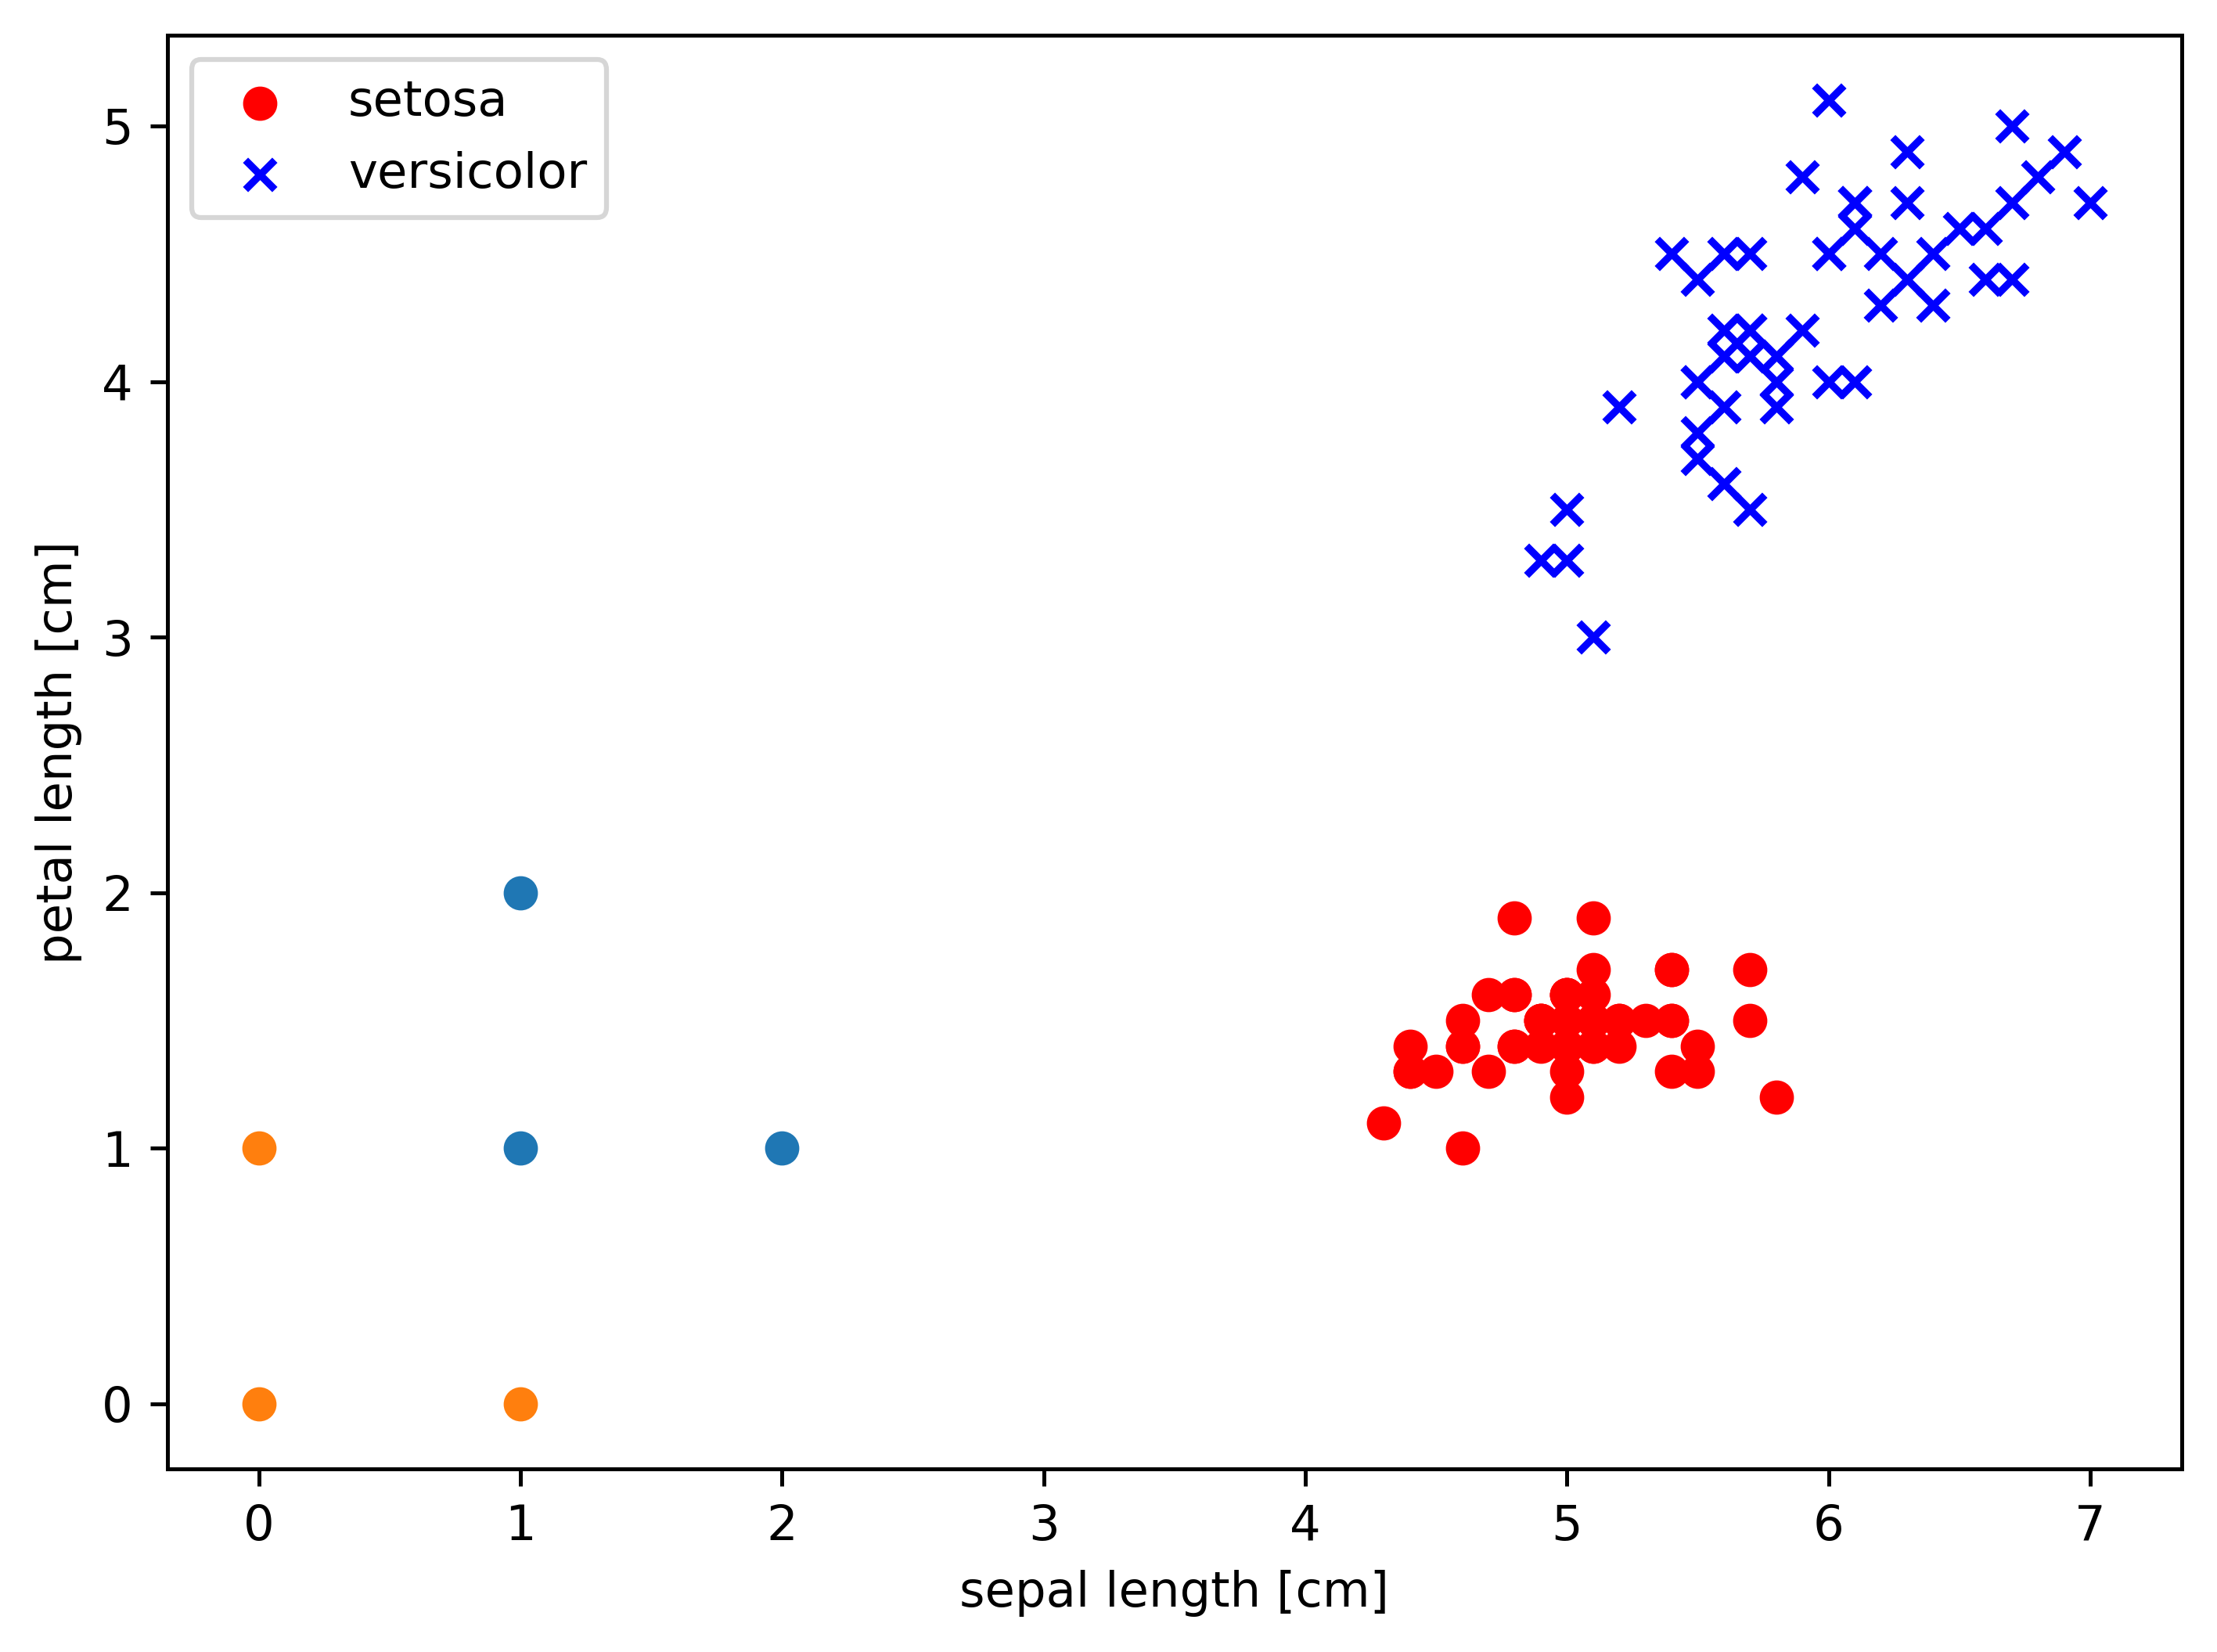

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [59]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn = ppn.fit(X, y)

In [60]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

As shown in function plot_decision_regions, the decision regions can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, as artificially set below, the boundary will appear inaccurate.

Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

In [80]:
def plot_decision_boundary(X, y, classifier):    
    
    # replace the two lines below with your code
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, levels=[0], colors='black', linewidths=2)
    
    # plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')

C:\Users\qwq\AppData\Local\Temp\ipykernel_94000\2359105906.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


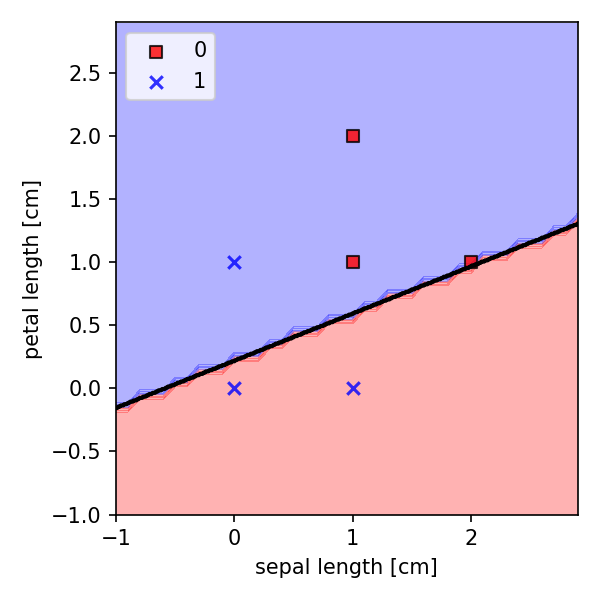

In [84]:
low_res = 0.1 # intentional for this exercise
plt.figure(figsize=(4,4))
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### B2

In class we applied different scikit-learn classifers for the Iris data set.

In this question, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

In [94]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


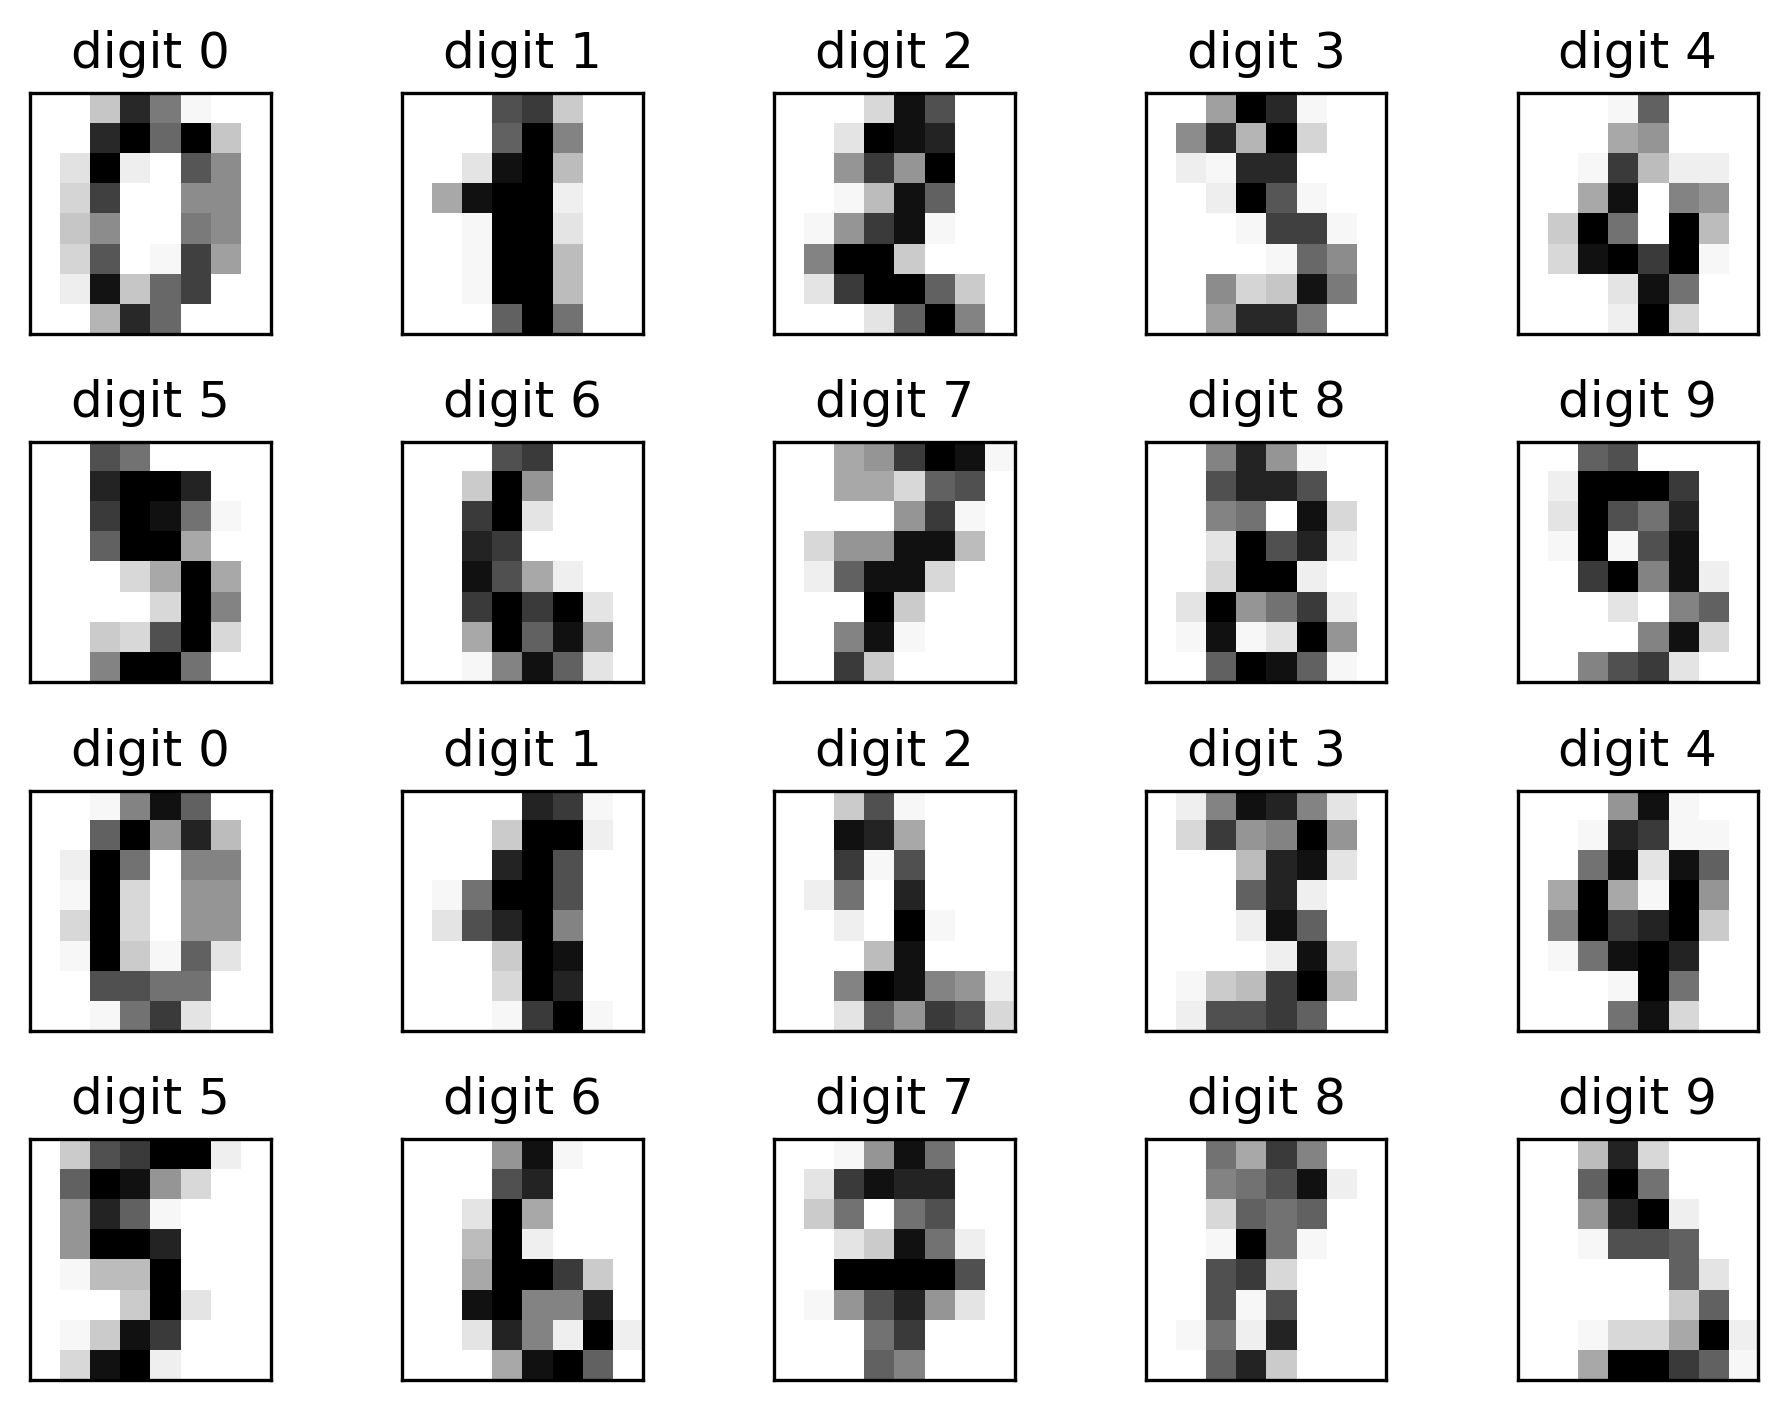

In [64]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Date Preprocessing

Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [104]:
#Your code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1797,)
(1437,)
(360,)


Classifier #1 Perceptron

In [115]:
#Your code, including traing and testing, to observe the accuracies.
ppn = Perceptron(eta=0, n_iter=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
# y_pred
accuracy_score(y_test, y_pred)

0.07777777777777778

Classifier #2 Logistic Regression

In [117]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression

lgst = LogisticRegression(penalty='l1', solver='saga', max_iter=200)
lgst.fit(X_train, y_train)
y_pred = lgst.predict(X_test)

accuracy_score(y_test, y_pred)

d:\Application\conda\envs\llama3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.975

Classifier #3 SVM

In [119]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC

svm = SVC(kernel='linear', max_iter=200)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy_score(y_test, y_pred)

d:\Application\conda\envs\llama3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.975

Classifier #4 Decision Tree

In [130]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='log_loss', max_depth=48)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9

Classifer #5 Random Forest

In [131]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='log_loss', max_features='log2')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy_score(y_test, y_pred)

0.975

Classifier #6 KNN

In [132]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier

knn = RandomForestClassifier(criterion='log_loss', max_features='log2')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9777777777777777

### B3
Build a spam classifier:



*   Download examples of spam and ham from Apache SpamAssassin’s public datasets.
*   Unzip the datasets and familiarize yourself with the data format.
*   Split the datasets into a training set and a test set.
*   Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
*   You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

*   Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

#### Data Preparation Pipeline
Now, we'll create a data preparation pipeline to convert each email into a feature vector. We'll define a function that takes an email and applies the various transformations based on the hyperparameters. Here's an example implementation:

In [134]:
import os
import tarfile
import urllib
 
DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets","spam")
 
def fetch_spam_data(spam_url = SPAM_URL,spam_path = SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename,url in (("ham.tar.bz2",HAM_URL),("spam.tar.bz2",SPAM_URL)):
        path = os.path.join(spam_path,filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url,path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path = SPAM_PATH)
        tar_bz2_file.close()
fetch_spam_data()


In [147]:
HAM_DIR = os.path.join(SPAM_PATH,"easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH,"spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

print(len(ham_filenames))
print(len(spam_filenames))

2500
500


In [151]:
import email
import email.policy
def load_email(is_spam,filename,spam_path = SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path,directory,filename),"rb") as f:
        return email.parser.BytesParser(policy = email.policy.default).parse(f)
    
ham_emails = [load_email(is_spam = False,filename = name) for name in ham_filenames]
spam_emails = [load_email(is_spam = True,filename = name) for name in spam_filenames]

def get_email_structure(email):
    if isinstance(email,str):
        return email
    payload = email.get_payload()
    if isinstance(payload,list):
        return "multipart({})".format(",".join([
			get_email_structure(sub_email)
			for sub_email in payload        
        ]))
    else:
        return email.get_content_type()

from collections import Counter
def structures_counter(emails):
    structures = Counter(get_email_structure(email) for email in emails)
    return structures

structures_counter(ham_emails).most_common()


[('text/plain', 2408),
 ('multipart(text/plain,application/pgp-signature)', 66),
 ('multipart(text/plain,text/html)', 8),
 ('multipart(text/plain,text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain,application/octet-stream)', 2),
 ('multipart(text/plain,text/enriched)', 1),
 ('multipart(text/plain,application/ms-tnef,text/plain)', 1),
 ('multipart(multipart(text/plain,text/plain,text/plain),application/pgp-signature)',
  1),
 ('multipart(text/plain,video/mng)', 1),
 ('multipart(text/plain,multipart(text/plain))', 1),
 ('multipart(text/plain,application/x-pkcs7-signature)', 1),
 ('multipart(text/plain,multipart(text/plain,text/plain),text/rfc822-headers)',
  1),
 ('multipart(text/plain,multipart(text/plain,text/plain),multipart(multipart(text/plain,application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain,application/x-java-applet)', 1)]

In [152]:
import numpy as np
from sklearn.model_selection import train_test_split
X = ham_emails + spam_emails
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))


In [159]:
import re
import string
from email.message import EmailMessage
# !pip install nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Create a PorterStemmer instance for stemming
stemmer = PorterStemmer()

def prepare_email(email: EmailMessage, strip_headers=True, to_lower=True, remove_punctuation=True,
                   replace_urls=True, replace_numbers=True, perform_stemming=True):
    email = '\n'.join(email.values())
    if strip_headers:
        # Remove email headers (assuming they are at the beginning of the email)
        email = re.sub(r'^.*?\n\n', '', email)

    if to_lower:
        email = email.lower()

    if remove_punctuation:
        # Remove all punctuation characters
        email = email.translate(str.maketrans('', '', string.punctuation))

    if replace_urls:
        # Replace all URLs with "URL"
        email = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F]{2}))+', 'URL', email)

    if replace_numbers:
        # Replace all numbers with "NUMBER"
        email = re.sub(r'\d+', 'NUMBER', email)

    if perform_stemming:
        # Split the email into words and perform stemming on each word
        words = email.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        email = " ".join(stemmed_words)

    return email

# Create a CountVectorizer to convert emails to feature vectors
vectorizer = CountVectorizer()

def convert_emails_to_vectors(emails, **kwargs):
    prepared_emails = [prepare_email(email, **kwargs) for email in emails]
    return vectorizer.fit_transform(prepared_emails)

X_vectors = convert_emails_to_vectors(X)

In [160]:
X_train,X_test,y_train,y_test = train_test_split(X_vectors,y,test_size = 0.2,random_state = 42)

#### Trying out Classifiers

Now that we have our data in the form of feature vectors, we can try out several classifiers to build a spam classifier. Here, we'll try out a Logistic Regression classifier and a Naive Bayes classifier as examples.

#### LogisticRegression

In [167]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, balanced_accuracy_score


logreg = LogisticRegression('l1', solver='saga', verbose=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
def eval_all(y_test, y_pred):
	recall = recall_score(y_test, y_pred)
	precision = precision_score(y_test, y_pred)
	accuracy = accuracy_score(y_test, y_pred)
	balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
	cm = confusion_matrix(y_test, y_pred)

	print("Recall:", recall)
	print("Precision:", precision)
	print("Accuracy:", accuracy)
	print("Balanced Accuracy:", balanced_accuracy)
	print("Confusion Matrix:", cm)

eval_all(y_test, y_pred)

max_iter reached after 1 seconds
Recall: 0.968421052631579
Precision: 1.0
Accuracy: 0.995
Balanced Accuracy: 0.9842105263157894
Confusion Matrix: [[505   0]
 [  3  92]]


d:\Application\conda\envs\llama3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### NaiveBayes

In [171]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

eval_all(y_test, y_pred)

Recall: 0.9789473684210527
Precision: 0.9393939393939394
Accuracy: 0.9866666666666667
Balanced Accuracy: 0.9835330901511203
Confusion Matrix: [[499   6]
 [  2  93]]


#### KNN

In [172]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

eval_all(y_test, y_pred)

Recall: 0.9368421052631579
Precision: 0.898989898989899
Accuracy: 0.9733333333333334
Balanced Accuracy: 0.958520062532569
Confusion Matrix: [[495  10]
 [  6  89]]


#### Random Forest

In [170]:
rfc = RandomForestClassifier(criterion='log_loss', max_features='log2')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

eval_all(y_test, y_pred)

Recall: 0.9894736842105263
Precision: 1.0
Accuracy: 0.9983333333333333
Balanced Accuracy: 0.9947368421052631
Confusion Matrix: [[505   0]
 [  1  94]]
